In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/joined.csv", delimiter=",").astype(np.float32)
eeg_data.shape

(12, 170752)

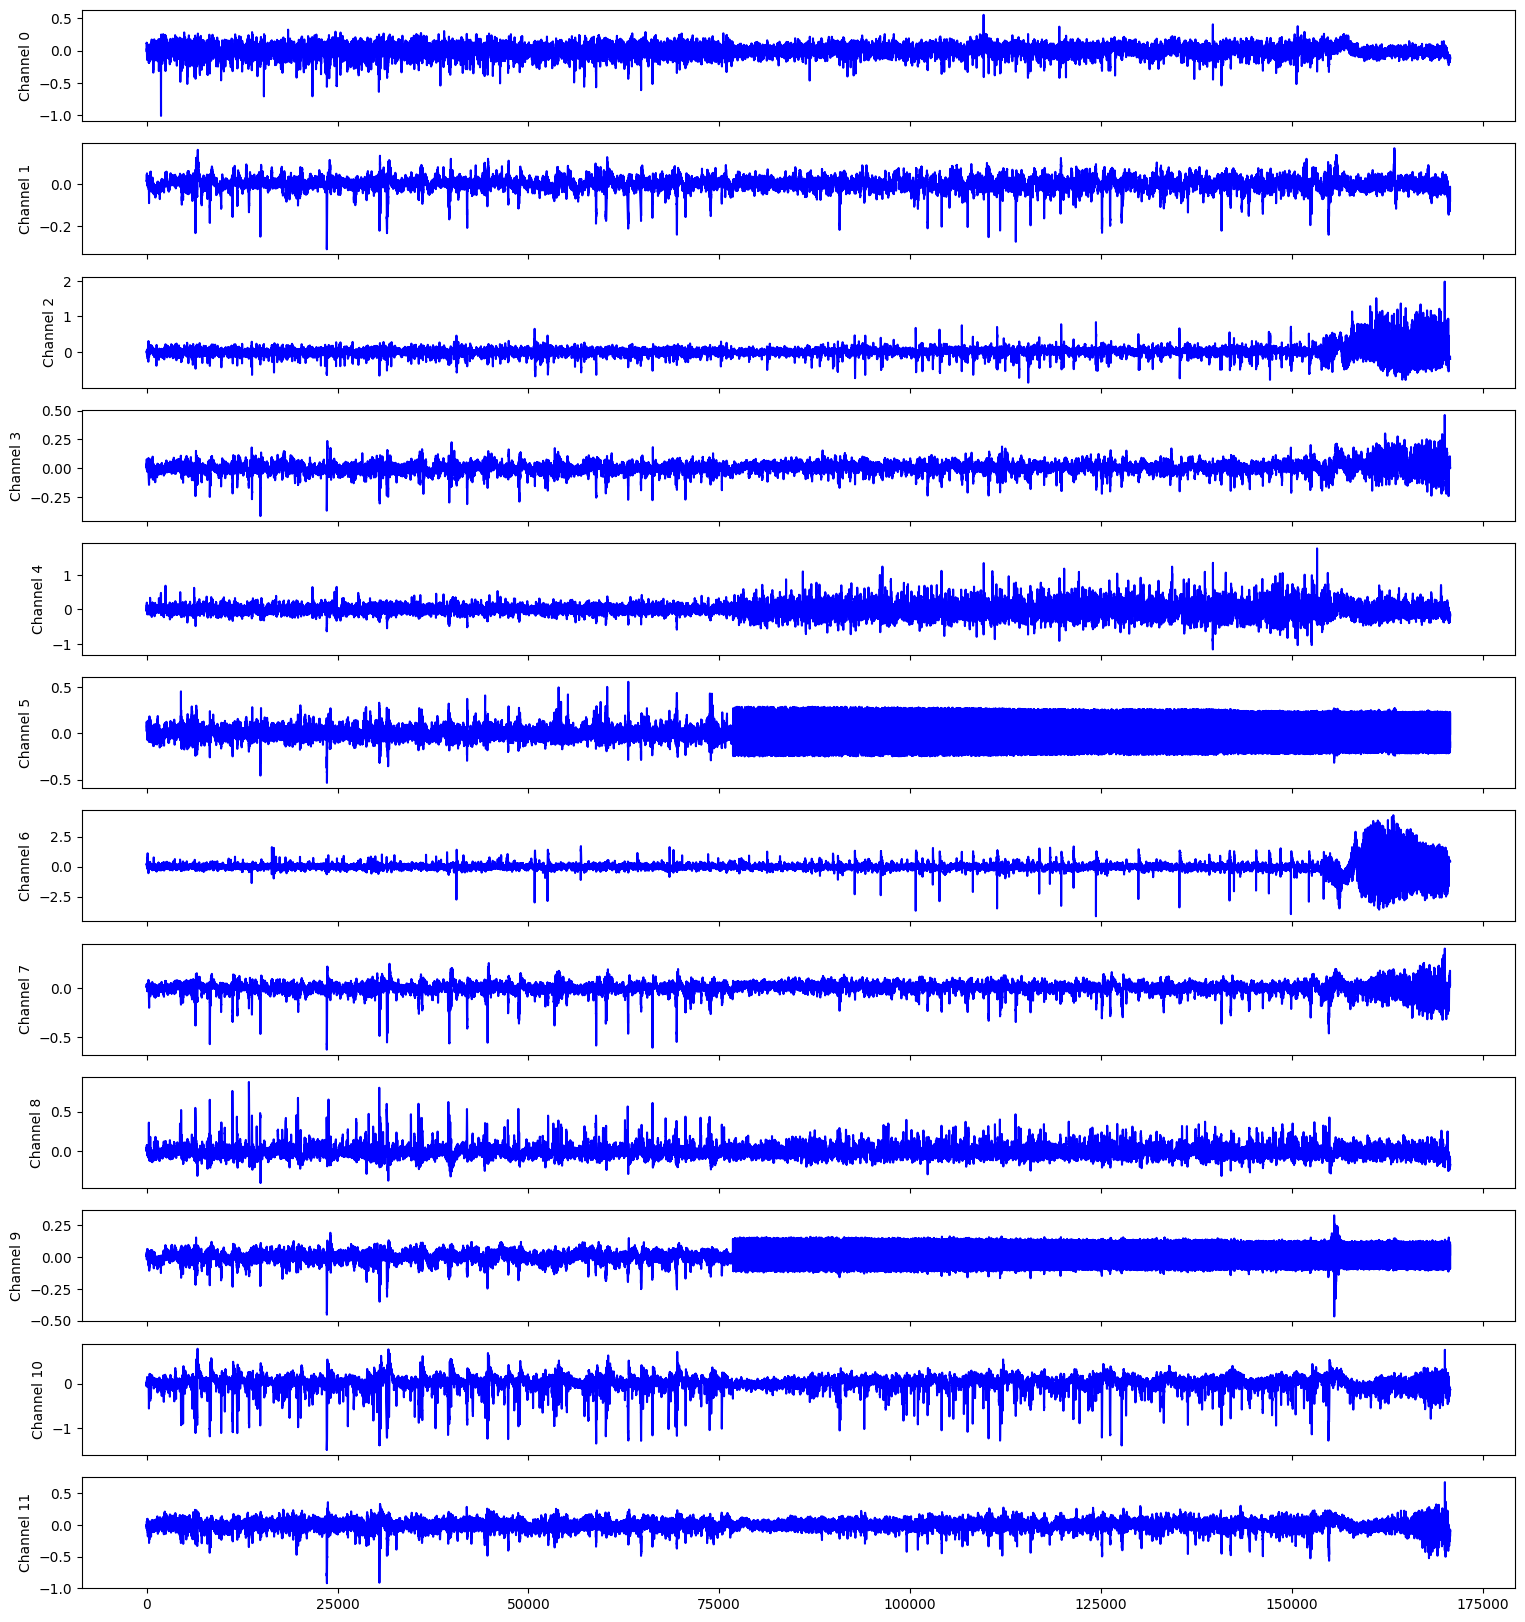

In [2]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [3]:
import pandas as pd

# convert to df
df = pd.DataFrame(eeg_data.T, columns=[f"channel_{i}" for i in range(12)] )

df.shape

(170752, 12)

In [5]:
from importlib import reload
import CPD.benchmark

reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [6]:
cpd = CPD.benchmark.Online(data=df, n0=30, M=5, k=4, s=128, verbose=True)

# warmup cpd
cpd.warmup()

Creating AR(p) for channel_10. Determining best order
Creating AR(p) for channel_6. Determining best order
Creating AR(p) for channel_1. Determining best order
Creating AR(p) for channel_5. Determining best order
Creating AR(p) for channel_9. Determining best order
Creating AR(p) for channel_11. Determining best order
Creating AR(p) for channel_7. Determining best order
Creating AR(p) for channel_8. Determining best order
Creating AR(p) for channel_4. Determining best order
Creating AR(p) for channel_2. Determining best order
Creating AR(p) for channel_3. Determining best order
Creating AR(p) for channel_0. Determining best order


In [8]:
change_point = cpd.run()

print(f"change point detected at t={change_point}")

channel_0: checking for change-point at step 30channel_2: checking for change-point at step 30

channel_0: checking for change-point at step 31
channel_3: checking for change-point at step 30
channel_1: checking for change-point at step 30
channel_10: checking for change-point at step 30
channel_2: checking for change-point at step 31
channel_3: checking for change-point at step 31
channel_10 Rejection incremented
channel_10: checking for change-point at step 31
channel_0: checking for change-point at step 32channel_10: checking for change-point at step 32
channel_1: checking for change-point at step 31
channel_9: checking for change-point at step 30

channel_4: checking for change-point at step 30
channel_5: checking for change-point at step 30
channel_3 Rejection incremented
channel_3: checking for change-point at step 32
channel_5: checking for change-point at step 31
channel_4: checking for change-point at step 31
channel_1: checking for change-point at step 32
channel_5: checking 

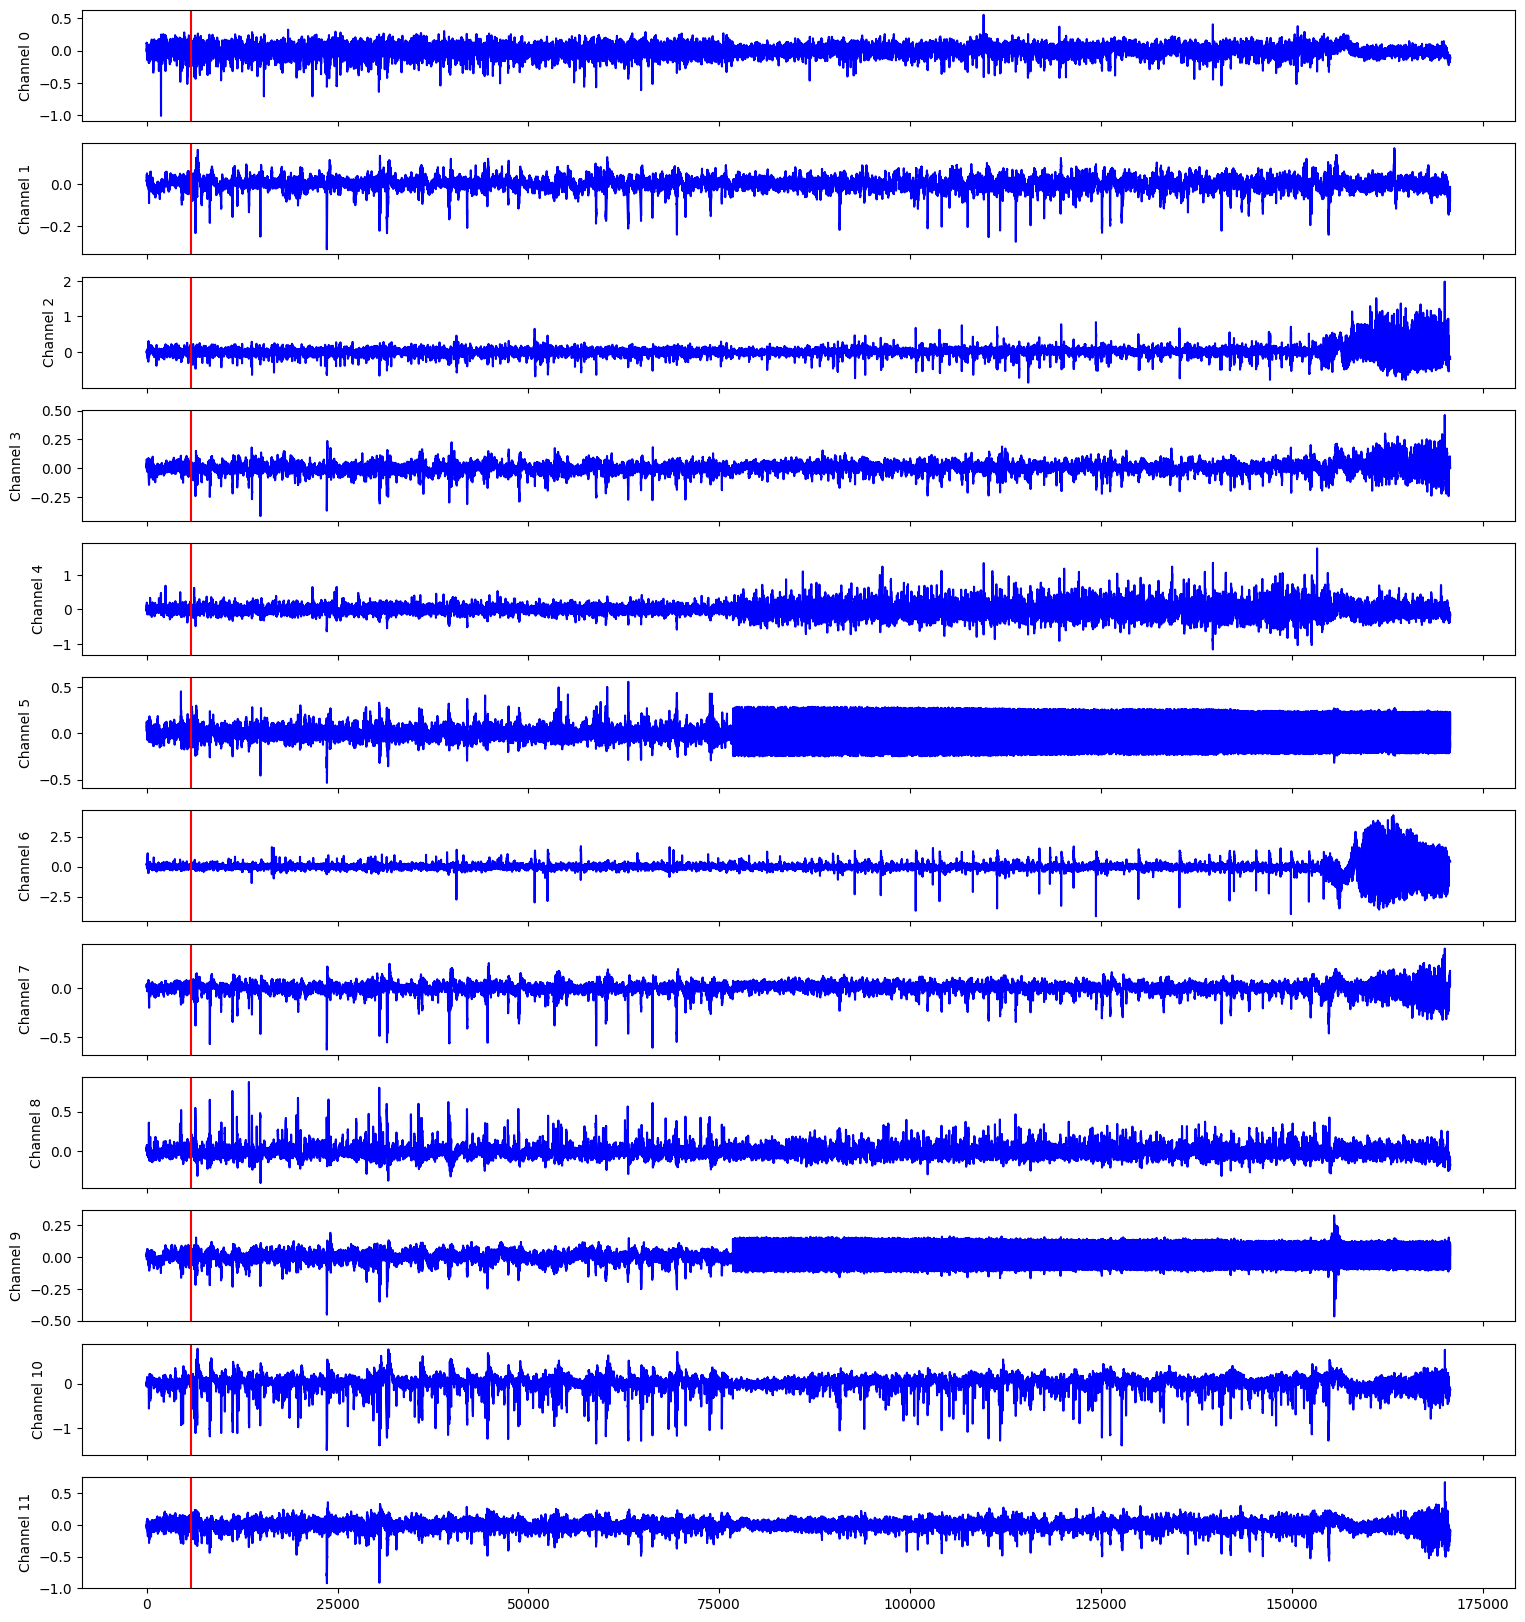

In [68]:
fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].axvline(x=change_point, c='r')
    axs[c].set_ylabel(f"Channel {c}")

Utilize the online version of the algorithm to tune your hyperparameters.